In [39]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [40]:
gd_1 = pd.read_csv("Plant_1_Generation_Data.csv")
gd_2 = pd.read_csv("Plant_2_Generation_Data.csv")

wd_1 = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")
wd_2 = pd.read_csv("Plant_2_Weather_Sensor_Data.csv")

In [41]:
def data_info(data):
    cache = []
    columns = data.columns
    display(data.head(3))
    
    for i in data.columns:
        sample_size = data[i].shape[0]
        dtypes = data[i].dtype
        unique = data[i].nunique()
        
        nan_values = data[i].isnull().sum()
        duplicated = data.duplicated().sum()
        
        cache.append([i,sample_size, dtypes, unique, nan_values, duplicated])

    cache = pd.DataFrame(cache, columns = ["Column", "Sample_Size", "D_Type", "Unique", "Nan_Values", "Duplicated"])
    return cache

In [42]:
gd_1_info = data_info(gd_1)
display(gd_1_info)

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0


,Column,Sample_Size,D_Type,Unique,Nan_Values,Duplicated
0,DATE_TIME,68778,object,3158,0,0
1,PLANT_ID,68778,int64,1,0,0
2,SOURCE_KEY,68778,object,22,0,0
3,DC_POWER,68778,float64,32909,0,0
4,AC_POWER,68778,float64,32686,0,0
5,DAILY_YIELD,68778,float64,29900,0,0
6,TOTAL_YIELD,68778,float64,37267,0,0


In [43]:
wd_1_info = data_info(wd_1)
display(wd_1_info)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0


,Column,Sample_Size,D_Type,Unique,Nan_Values,Duplicated
0,DATE_TIME,3182,object,3182,0,0
1,PLANT_ID,3182,int64,1,0,0
2,SOURCE_KEY,3182,object,1,0,0
3,AMBIENT_TEMPERATURE,3182,float64,3182,0,0
4,MODULE_TEMPERATURE,3182,float64,3182,0,0
5,IRRADIATION,3182,float64,1758,0,0


In [44]:
gd_1["DATE_TIME"] = pd.to_datetime(gd_1["DATE_TIME"], format = "%d-%m-%Y %H:%M")
wd_1["DATE_TIME"] = pd.to_datetime(wd_1["DATE_TIME"], format = "%Y-%m-%d %H:%M:%S")

In [45]:
merged_1 = pd.merge(gd_1.drop(columns={"PLANT_ID"}, axis=1), wd_1.drop(columns={"PLANT_ID", "SOURCE_KEY"}, axis=1), on="DATE_TIME")

In [46]:
solar_1_info = data_info(merged_1)
display(solar_1_info)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0


,Column,Sample_Size,D_Type,Unique,Nan_Values,Duplicated
0,DATE_TIME,68774,datetime64[ns],3157,0,0
1,SOURCE_KEY,68774,object,22,0,0
2,DC_POWER,68774,float64,32906,0,0
3,AC_POWER,68774,float64,32683,0,0
4,DAILY_YIELD,68774,float64,29899,0,0
5,TOTAL_YIELD,68774,float64,37263,0,0
6,AMBIENT_TEMPERATURE,68774,float64,3157,0,0
7,MODULE_TEMPERATURE,68774,float64,3157,0,0
8,IRRADIATION,68774,float64,1755,0,0


In [47]:
merged_1["DATE_TIME"] = pd.to_datetime(merged_1["DATE_TIME"], format = "%d-%m-%Y %H:%M:%S")

merged_1["DATE"] = pd.to_datetime(merged_1["DATE_TIME"]).dt.date
merged_1["TIME"] = pd.to_datetime(merged_1["DATE_TIME"]).dt.time
merged_1['DAY'] = pd.to_datetime(merged_1['DATE_TIME']).dt.day
merged_1['MONTH'] = pd.to_datetime(merged_1['DATE_TIME']).dt.month

merged_1['HOURS'] = pd.to_datetime(merged_1['TIME'],format='%H:%M:%S').dt.hour
merged_1['MINUTES'] = pd.to_datetime(merged_1['TIME'],format='%H:%M:%S').dt.minute
merged_1['TOTAL MINUTES PASS'] = merged_1['MINUTES'] + merged_1['HOURS']*60

merged_1["DATE_STRING"] = merged_1["DATE"].astype(str)
merged_1["TIME_STRING"] = merged_1["TIME"].astype(str)

merged_1.head(3)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,TIME_STRING
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,00:00:00
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,00:00:00
2,2020-05-15,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,25.184316,22.857507,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15,00:00:00


In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

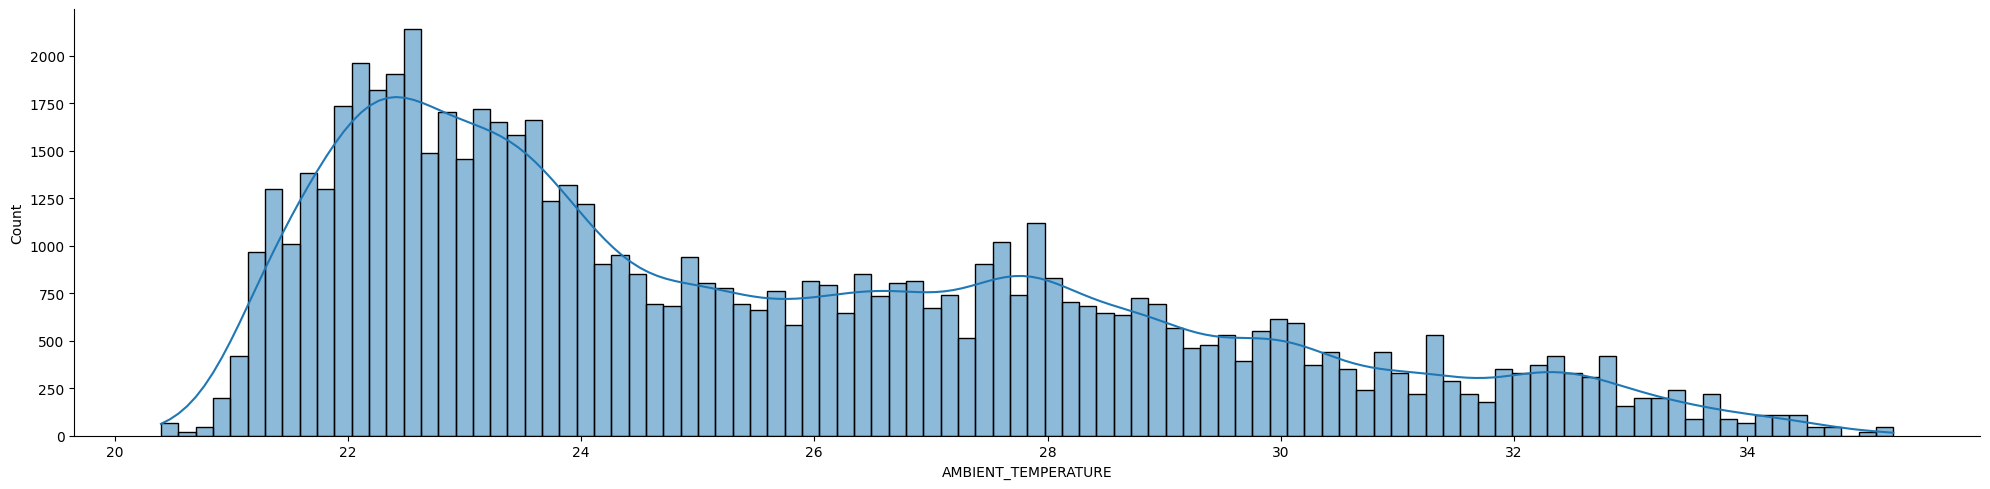

In [49]:
sns.displot(data= merged_1, x="AMBIENT_TEMPERATURE", kde= True, bins = 100, height=5, aspect=4)

In [50]:
ac_total = merged_1.groupby(["DATE"])[["AC_POWER"]].sum().add_suffix("_total")
dc_total = merged_1.groupby(["DATE"])[["DC_POWER"]].sum().add_suffix("_total")

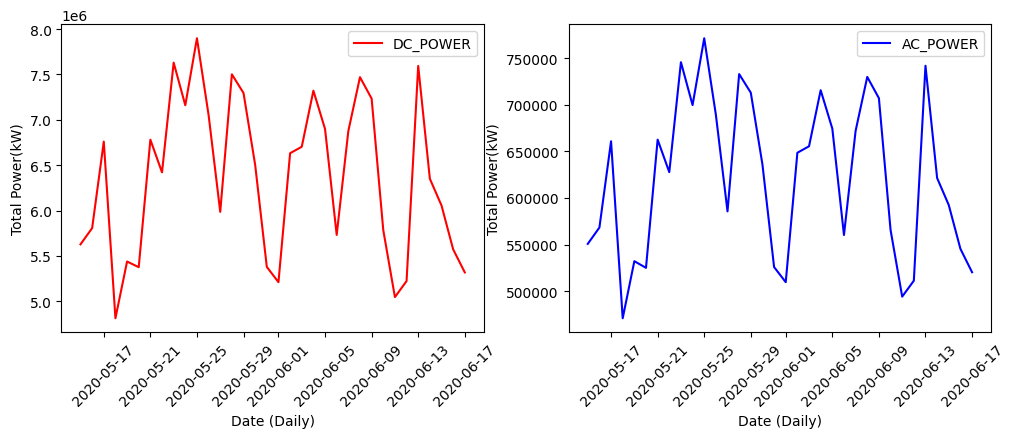

In [51]:
fig, axs = plt.subplots(figsize=(12,4), ncols=2)

sns.lineplot(dc_total["DC_POWER_total"], label = "DC_POWER", color="red", ax=axs[0], ci = None)
axs[0].tick_params(axis = "x", labelrotation = 45)
axs[0].set(ylabel = "Total Power(kW)", xlabel = "Date (Daily)")
sns.lineplot(ac_total["AC_POWER_total"], label = "AC_POWER", color="blue", ax=axs[1], ci = None)
axs[1].tick_params(axis = "x", labelrotation = 45)
axs[1].set(ylabel = "Total Power(kW)", xlabel = "Date (Daily)")
plt.show()

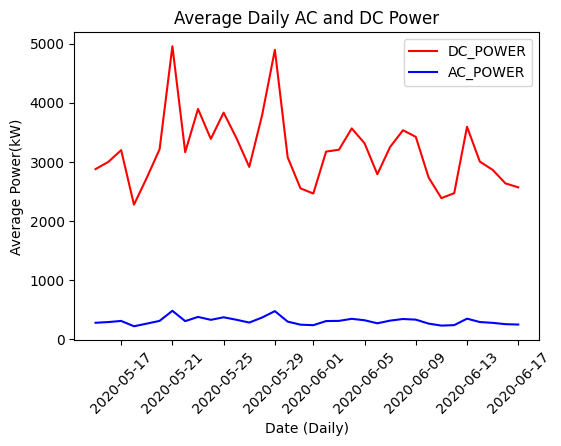

In [52]:
fig,ax=plt.subplots(figsize=(6,4))
sns.lineplot(data= merged_1, x = "DATE", y= "DC_POWER", label = "DC_POWER", color="red", ax=ax, ci = None)
sns.lineplot(data= merged_1, x = "DATE", y= "AC_POWER", label = "AC_POWER", color="blue", ax=ax, ci =None)
ax.set_title("Average Daily AC and DC Power")
plt.xlabel("Date (Daily)")
plt.ylabel("Average Power(kW)")
plt.xticks(rotation=45)
ax.legend()
plt.show()

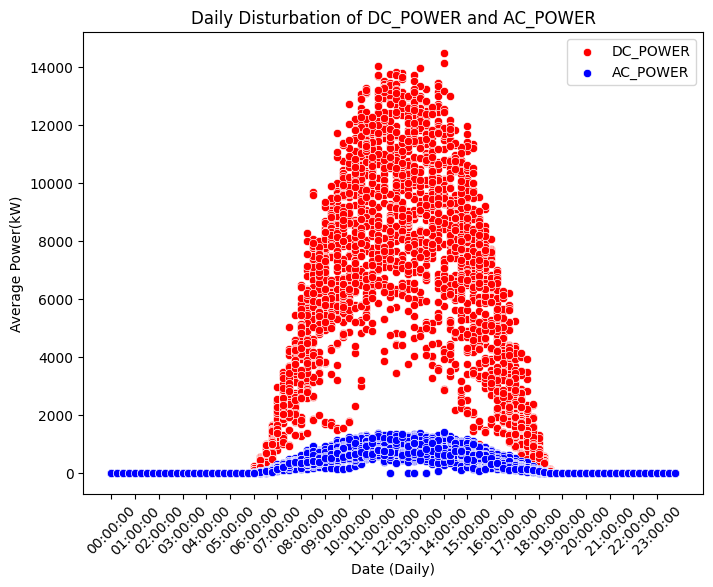

In [53]:
fig,ax=plt.subplots(figsize=(8,6))
sns.scatterplot(data= merged_1[::12], x = "TIME_STRING", y= "DC_POWER", label = "DC_POWER", color="red", ax=ax)
sns.scatterplot(data= merged_1[::12], x = "TIME_STRING", y= "AC_POWER", label = "AC_POWER", color="blue", ax=ax)
ax.set_title("Daily Disturbation of DC_POWER and AC_POWER")
plt.xlabel("Date (Daily)")
plt.ylabel("Average Power(kW)")
plt.xticks(np.arange(0,96,4), rotation=45)
ax.legend()
plt.show()

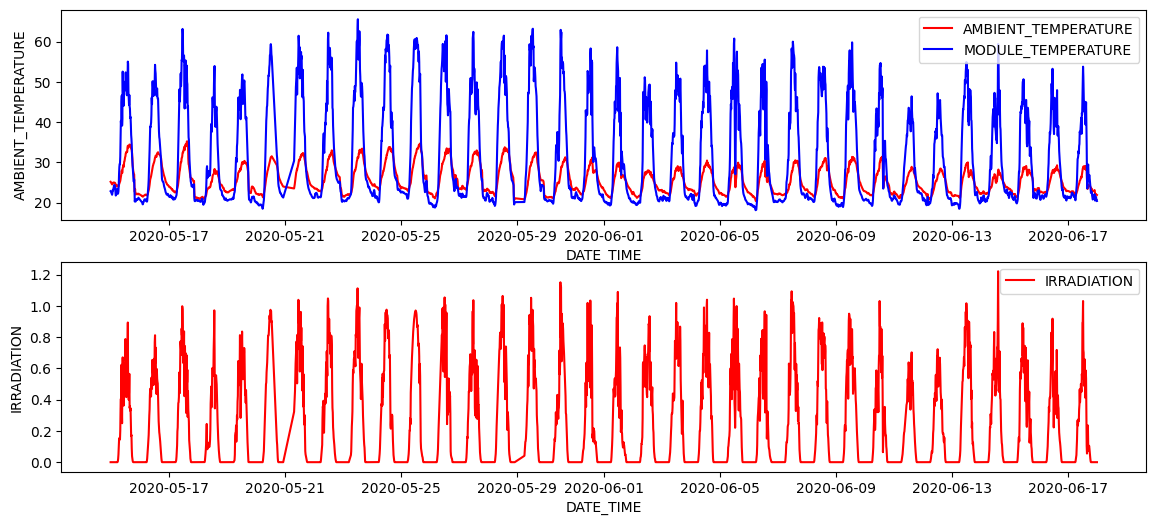

In [54]:
fig,ax=plt.subplots(figsize=(14,6), nrows= 2)
sns.lineplot(data= merged_1, x = "DATE_TIME", y= "AMBIENT_TEMPERATURE", label = "AMBIENT_TEMPERATURE", color="red", ax=ax[0], ci = None)
sns.lineplot(data= merged_1, x = "DATE_TIME", y= "MODULE_TEMPERATURE", label = "MODULE_TEMPERATURE", color="blue", ax=ax[0], ci =None)
axs[0].tick_params(axis = "x", labelrotation = 45)
axs[0].set(ylabel = "TEMPERATURE (Celcius)", xlabel = "Date (Daily)")
axs[0].set_title("Trend of TEMPERATURE")

sns.lineplot(data= merged_1, x = "DATE_TIME", y= "IRRADIATION", label = "IRRADIATION", color="red", ax=ax[1], ci = None)
axs[1].tick_params(axis = "x", labelrotation = 45)
axs[1].set(ylabel = "TEMPERATURE (Celcius)", xlabel = "Date (Daily)")
plt.show()

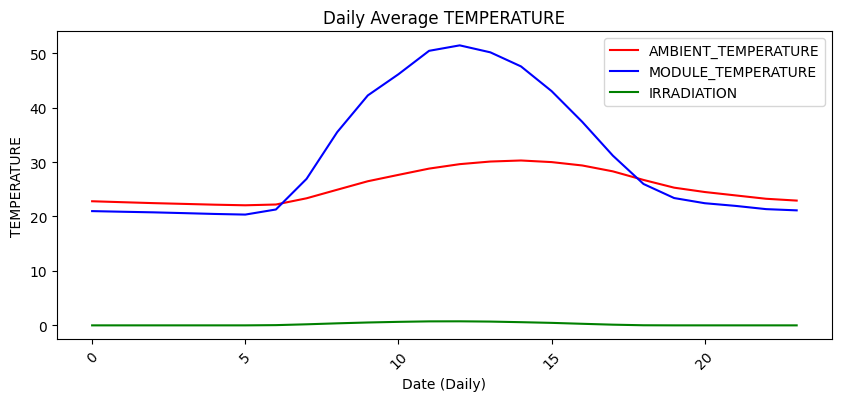

In [55]:
fig,ax=plt.subplots(figsize=(10,4))
sns.lineplot(data= merged_1, x = "HOURS", y= "AMBIENT_TEMPERATURE", label = "AMBIENT_TEMPERATURE", color="red", ax=ax, ci = None)
sns.lineplot(data= merged_1, x = "HOURS", y= "MODULE_TEMPERATURE", label = "MODULE_TEMPERATURE", color="blue", ax=ax, ci =None)
sns.lineplot(data= merged_1, x = "HOURS", y= "IRRADIATION", label = "IRRADIATION", color="green", ax=ax, ci =None)
ax.set_title("Daily Average TEMPERATURE")
plt.xlabel("Date (Daily)")
plt.ylabel("TEMPERATURE")
plt.xticks(rotation=45)
ax.legend()
plt.show()

In [56]:
dc_to_ac_perc = (100* ac_total["AC_POWER_total"]) / (dc_total["DC_POWER_total"])

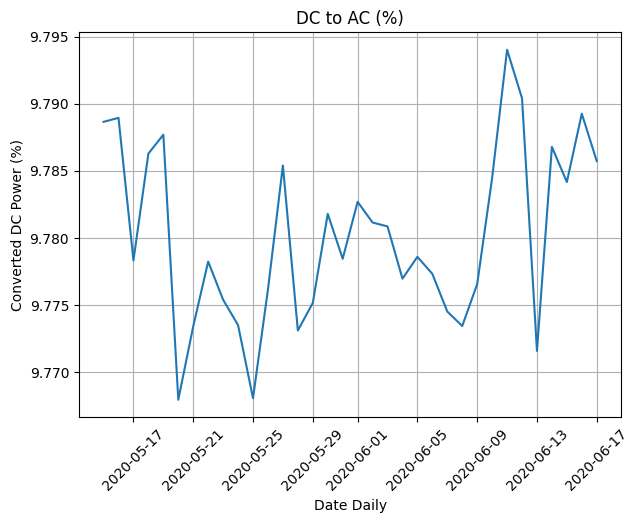

In [57]:
plt.figure(figsize=(7, 5))
dc_to_ac_perc.plot()
plt.title("DC to AC (%)")
plt.xlabel("Date Daily")
plt.ylabel("Converted DC Power (%)")
plt.xticks(rotation = 45)
plt.grid()
plt.show()

Text(0.5, 1.0, 'Sorted Total AC_Power')

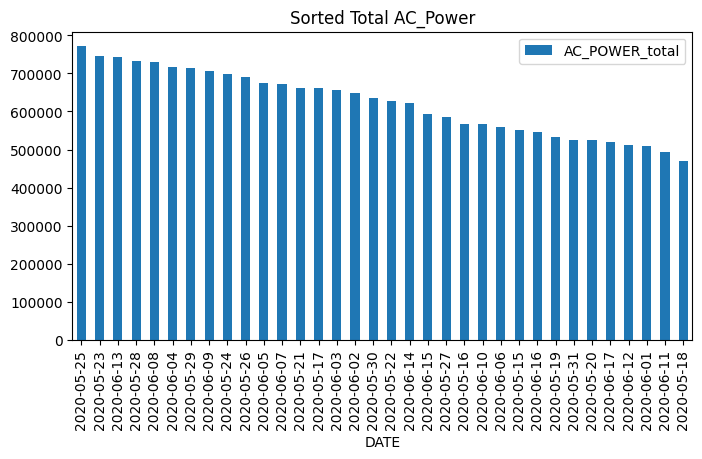

In [58]:
plt.subplots(figsize=(8,4))
ac_total["AC_POWER_total"].sort_values(ascending=False).plot(kind="bar", legend=True)
plt.title("Sorted Total AC_Power")

In [59]:
merged_highest = merged_1[merged_1["DATE_STRING"] == "2020-05-25"]
merged_lowest = merged_1[merged_1["DATE_STRING"] == "2020-05-18"]

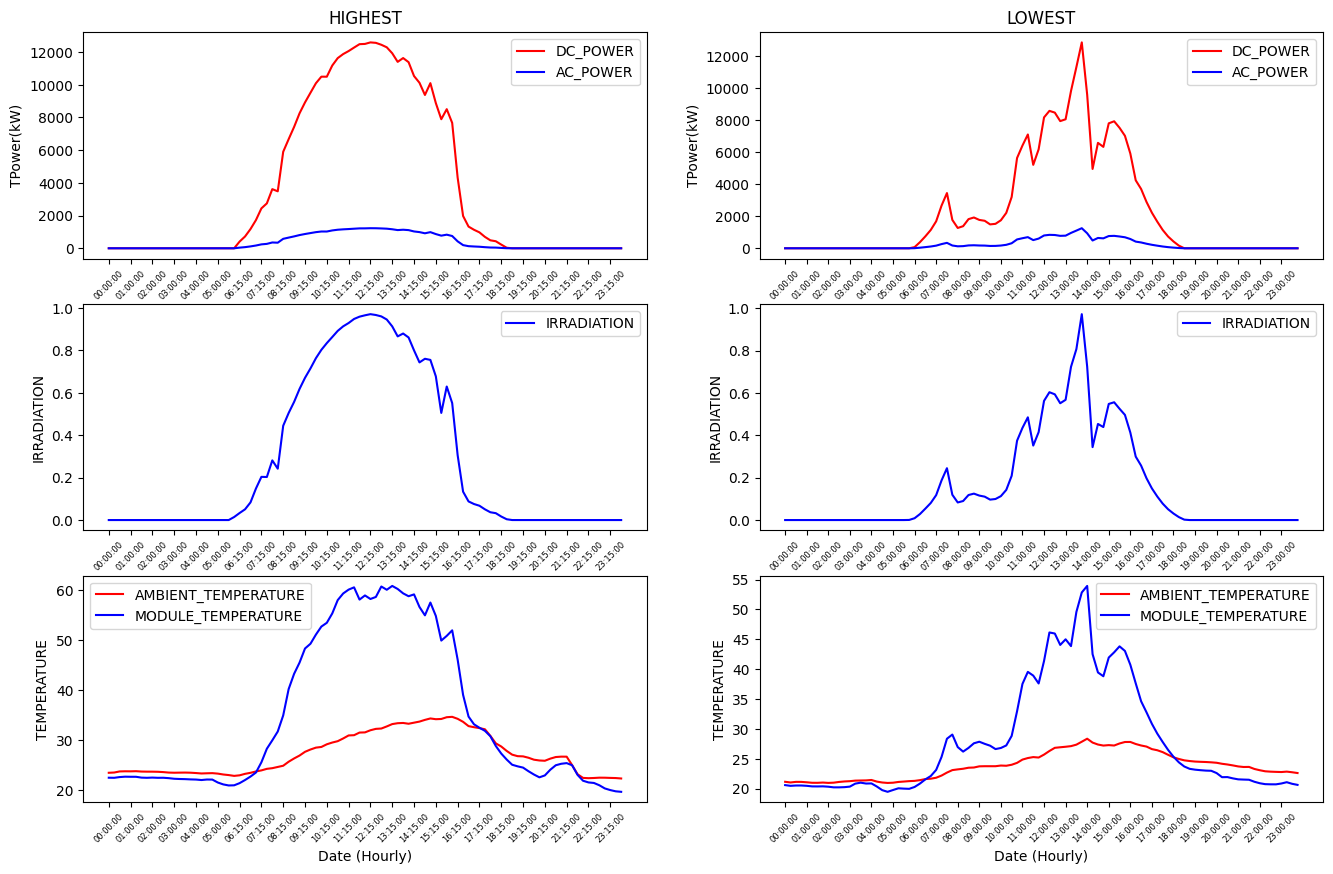

In [60]:
fig, axs = plt.subplots(figsize=(16,10), nrows =3, ncols=2)
######HIGHEST########
sns.lineplot(x = merged_highest["TIME_STRING"],y = merged_highest["DC_POWER"], label = "DC_POWER", color="red", ax=axs[0][0], ci = None)
sns.lineplot(x = merged_highest["TIME_STRING"],y = merged_highest["AC_POWER"], label = "AC_POWER", color="blue", ax=axs[0][0],  ci = None)
axs[0][0].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[0][0].set_xticks(np.arange(0,96,4))
axs[0][0].set(ylabel = "TPower(kW)", xlabel = "Date (Hourly)")
axs[0][0].set_title("HIGHEST")

sns.lineplot(x = merged_highest["TIME_STRING"], y= merged_highest["IRRADIATION"],label = "IRRADIATION", color="blue", ax=axs[1][0], ci = None)
axs[1][0].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[1][0].set_xticks(np.arange(0,96,4))
axs[1][0].set(ylabel = "IRRADIATION", xlabel = "Date (Hourly)")

sns.lineplot(x = merged_highest["TIME_STRING"],y = merged_highest["AMBIENT_TEMPERATURE"], label = "AMBIENT_TEMPERATURE", color="red", ax=axs[2][0], ci = None)
sns.lineplot(x = merged_highest["TIME_STRING"],y = merged_highest["MODULE_TEMPERATURE"], label = "MODULE_TEMPERATURE", color="blue", ax=axs[2][0],  ci = None)
axs[2][0].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[2][0].set_xticks(np.arange(0,96,4))
axs[2][0].set(ylabel = "TEMPERATURE", xlabel = "Date (Hourly)")
###################

######LOWEST########
sns.lineplot(x = merged_lowest["TIME_STRING"],y = merged_lowest["DC_POWER"], label = "DC_POWER", color="red", ax=axs[0][1], ci = None)
sns.lineplot(x = merged_lowest["TIME_STRING"],y = merged_lowest["AC_POWER"], label = "AC_POWER", color="blue", ax=axs[0][1],  ci = None)
axs[0][1].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[0][1].set_xticks(np.arange(0,96,4))
axs[0][1].set(ylabel = "TPower(kW)", xlabel = "Date (Hourly)")
axs[0][1].set_title("LOWEST")

sns.lineplot(x = merged_lowest["TIME_STRING"], y= merged_lowest["IRRADIATION"],label = "IRRADIATION", color="blue", ax=axs[1][1], ci = None)
axs[1][1].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[1][1].set_xticks(np.arange(0,96,4))
axs[1][1].set(ylabel = "IRRADIATION", xlabel = "Date (Hourly)")

sns.lineplot(x = merged_lowest["TIME_STRING"],y = merged_lowest["AMBIENT_TEMPERATURE"], label = "AMBIENT_TEMPERATURE", color="red", ax=axs[2][1], ci = None)
sns.lineplot(x = merged_lowest["TIME_STRING"],y = merged_lowest["MODULE_TEMPERATURE"], label = "MODULE_TEMPERATURE", color="blue", ax=axs[2][1],  ci = None)
axs[2][1].tick_params(axis = "x", rotation = 45, labelsize=6)
axs[2][1].set_xticks(np.arange(0,96,4))
axs[2][1].set(ylabel = "TEMPERATURE", xlabel = "Date (Hourly)")
plt.show()

In [61]:
##Efficieny = (Energy_Output/Engery_Input) * 100
AC_ef = merged_1[merged_1["AC_POWER"] > 0]

In [62]:
X = merged_1[["DAILY_YIELD", "TOTAL_YIELD", "AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION", "DC_POWER"]].values
y = merged_1["AC_POWER"].values

In [63]:
def standardization(X):
    ## Z = (X - X_mean) / Std_Dev
    mean = X.mean()
    std = X.std()
    Z = (X- mean) / (std)
    return Z

In [64]:
def split_data(X, y, random_state=42, sample_size=0.2):
    n = X.shape[0]
    test_size = int(n * sample_size)
    
    np.random.seed(random_state)
    temp = np.arange(n)
    shuffled_data = np.random.permutation(temp)
    
    train_ind = shuffled_data[test_size:]
    test_ind = shuffled_data[:test_size]
    
    X_train = X[train_ind]
    X_test = X[test_ind]
    
    y_train = y[train_ind]
    y_test = y[test_ind]
    return X_train, X_test, y_train, y_test

In [65]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [66]:
X_train = standardization(X_train)
X_test = standardization(X_test)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)
MAE_rfr = mean_absolute_error(y_pred_rfr, y_test)

print("R2 Score : ",R2_Score_rfr,"%")
print("MAE : ",MAE_rfr,"")

R2 Score :  100.0 %
MAE :  1.0433068152432776 


In [68]:
prediction_rfr = rfr.predict(X_test)

In [69]:
cross_checking_rfr = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_rfr})
cross_checking_rfr.head()

,Actual,Predicted
0,873.237500,872.156000
1,0.000000,0.000000
2,613.785714,611.916107
3,0.000000,0.000000
4,98.628571,97.049000


In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)
MAE_lr = mean_absolute_error(y_pred_lr, y_test)
#Make Normalization

print("R2 Score : ",R2_Score_lr,"%")
print("MAE : ",MAE_lr,"")

R2 Score :  94.88 %
MAE :  88.78003166515887 


In [71]:
prediction_lr = lr.predict(X_test)

In [72]:
cross_checking_lr = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_lr})
cross_checking_lr.head()

,Actual,Predicted
0,873.237500,961.228597
1,0.000000,89.199134
2,613.785714,701.423087
3,0.000000,89.327805
4,98.628571,188.731519


In [73]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = rfr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)
MAE_dtr = mean_absolute_error(y_pred_dtr, y_test)

print("R2 Score : ",R2_Score_dtr,"%")
print("MAE : ",MAE_dtr,"")

R2 Score :  100.0 %
MAE :  1.0433068152432776 


In [74]:
prediction_dtr = dtr.predict(X_test)

In [75]:
cross_checking_dtr = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_dtr})
cross_checking_dtr.head()

,Actual,Predicted
0,873.237500,872.212500
1,0.000000,0.000000
2,613.785714,612.142857
3,0.000000,0.000000
4,98.628571,96.871429
